Using tanzi SNP scores to generate a distribution. <br>
**Goal:** If any AD associated variant has an effect score that is >2 standard deviations away from 0, those are called outliers. The standard deviation is computed from the full set of Tanzi variants. <br>
**Tanzi SNPs:** full set of SNPs, not just the AD associated ones <br>
**AD GWAS SNPs and SNPs in LD with those:** will be scored and those scores used to identify those AD SNPs that are outliers on the Tanzi distribution.<br><br>

Why not use AD SNPs to generate distribution?<br>
Ans: AD SNPs are a good set to use for finemapping, but there are a couple of considerations:<br>
1) that set is too small to construct a reliable distribution (out of 1209, only ~20-200 would overlap peaks). We could expand the set from 1209 to a larger number by relaxing our cutoffs but we might lose data quality by relaxing those cutoffs<br>
2) we also want to test how AD associated SNPs behave in general compared to any other SNP. The hypothesis will be a little different if we use AD GWAS SNPs only to construct the distribution. If we use AD GWAS SNPs to construct the distribution and look for outliers, we are basically testing whether an AD SNP has stronger regulatory effect than other AD SNPs. But instead we want to test whether an AD SNP has stronger regulatory effect than all SNPs

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import f,pearsonr,spearmanr

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10

In [4]:
variant_info_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/merged.SNVs.NIMH+ADSP_v2.txt"

In [5]:
b_cell_scores_file ="tanzi_scores/B_cells_model_propagation_output.txt"
dendritic_scores_file ="tanzi_scores/dendritic_model_propagation_output.txt"
mono_scores_file = "tanzi_scores/mono_model_propagation_output.txt"

In [8]:
variant_info = pd.read_csv(variant_info_file,
                           sep='\t'
                          )

In [9]:
def readScoresFileAndConcat(scores_files_list,
                            variant_info,
                            names_list):

    colsuffixes = ["effect_score",
                   "ref_score",
                   "alt_score"
                  ]
    
    tables_to_concat = [variant_info]
    
    for i,scores_file in enumerate(scores_files_list):
        colnames = [names_list[i]+"_"+suffix for suffix in colsuffixes]
        scores = pd.read_csv(scores_file,
                             sep='\t',
                             names=colnames
                            )
        tables_to_concat.append(scores)
    
    variant_info = pd.concat(tables_to_concat,
                             axis=1
                            )
    return variant_info

In [10]:
scores_files_list = [b_cell_scores_file,
                     dendritic_scores_file,
                    mono_scores_file]
names_list = ["b_cell",
              "dendritic",
              "mono"
             ]

variant_info = readScoresFileAndConcat(scores_files_list,
                                       variant_info,
                                       names_list
                                      )

In [12]:
import scipy
from scipy import stats

print(np.mean(variant_info["b_cell_effect_score"]))
moments = scipy.stats.describe(variant_info["b_cell_effect_score"].tolist(),nan_policy='omit')
print(moments)
variant_info["b_cell_effect_score_normed"] = variant_info["b_cell_effect_score"]/np.sqrt(moments.variance)

print(np.mean(variant_info["dendritic_effect_score"]))
moments = scipy.stats.describe(variant_info["dendritic_effect_score"].tolist(),nan_policy='omit')
print(moments)
variant_info["dendritic_effect_score_normed"] = variant_info["dendritic_effect_score"]/np.sqrt(moments.variance)

print(np.mean(variant_info["mono_effect_score"]))
moments = scipy.stats.describe(variant_info["mono_effect_score"].tolist(),nan_policy='omit')
print(moments)
variant_info["mono_effect_score_normed"] = variant_info["mono_effect_score"]/np.sqrt(moments.variance)


0.0007081687372329965
DescribeResult(nobs=2053636, minmax=(masked_array(data=-0.14719701,
             mask=False,
       fill_value=1e+20), masked_array(data=0.14950633,
             mask=False,
       fill_value=1e+20)), mean=0.0007081687372329965, variance=0.0005663007662766383, skewness=masked_array(data=0.05614316,
             mask=False,
       fill_value=1e+20), kurtosis=4.032110070926786)
0.000638002712757935
DescribeResult(nobs=2794370, minmax=(masked_array(data=-0.23033166,
             mask=False,
       fill_value=1e+20), masked_array(data=0.2255609,
             mask=False,
       fill_value=1e+20)), mean=0.000638002712757935, variance=0.0008015163718529272, skewness=masked_array(data=0.0788033,
             mask=False,
       fill_value=1e+20), kurtosis=4.946903138122264)
0.00012759023980084212
DescribeResult(nobs=2614526, minmax=(masked_array(data=-0.354872,
             mask=False,
       fill_value=1e+20), masked_array(data=0.3123231,
             mask=False,
       f

/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/snigdhaa/anaconda3/envs/tf2/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWar

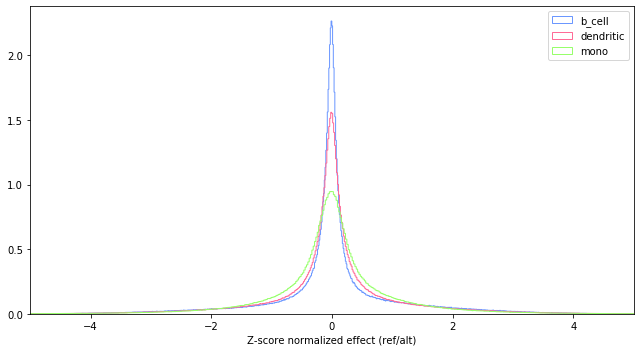

In [40]:
plt.figure(figsize=(9,5))
plt.hist(variant_info["b_cell_effect_score_normed"],
         density=True,
         bins=1000,
         color='#6b97ff',
         histtype='step',
         label='b_cell'
        )
plt.hist(variant_info["dendritic_effect_score_normed"],
         density=True,
         bins=1000,
         color='#ff6b97',
         histtype='step',
         label='dendritic'
        )
plt.hist(variant_info["mono_effect_score_normed"],
         density=True,
         bins=1000,
         color='#97ff6b',
         histtype='step',
         label='mono'
        )
plt.xlim([-5,5])
plt.xlabel("Z-score normalized effect (ref/alt)")
plt.legend()
plt.show()

Scoring AD SNPs against the Tanzi distribution.

In [43]:
ad_variant_file = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/common_variants/snigdha_snp_list_unique.txt"

In [44]:
ad_variant_info = pd.read_csv(ad_variant_file,
                           sep='\t'
                          )

In [45]:
ad_b_cell_scores = "AD_files/B_cells_model_propagation_output.txt"


In [46]:
ad_scores_files_list = [ad_b_cell_scores]
ad_names_list = ["b_cell"
             ]

ad_variant_info = readScoresFileAndConcat(ad_scores_files_list,
                                       ad_variant_info,
                                       names_list
                                      )
ad_variant_info.head()

,CHR,START,END,LD_RSID,REF,ALT,b_cell_effect_score,b_cell_ref_score,b_cell_alt_score
0,chr10,11707562,11707563,rs34388456,GCCT,G,NaN,NaN,NaN
1,chr10,11707914,11707915,rs11257227,A,G,NaN,NaN,NaN
2,chr10,11714506,11714507,rs74347557,C,T,NaN,NaN,NaN
3,chr10,11714685,11714686,rs77892763,C,T,NaN,NaN,NaN
4,chr10,11717396,11717397,rs11257238,T,C,NaN,NaN,NaN


In [48]:
#Using raw moment around 0 to scale effect scores.
# moments = scipy.stats.describe(variant_info["b_cell_effect_score"])
# 

print(np.mean(ad_variant_info["b_cell_effect_score"]))
print(np.var(ad_variant_info["b_cell_effect_score"]))
moments = scipy.stats.describe(ad_variant_info["b_cell_effect_score"].tolist(),nan_policy='omit')
print(moments)

ad_variant_info["b_cell_effect_score_normed"] = ad_variant_info["b_cell_effect_score"]/np.std(variant_info["b_cell_effect_score"])

0.003538617360185186
0.0007465049155228762
DescribeResult(nobs=108, minmax=(masked_array(data=-0.08843207,
             mask=False,
       fill_value=1e+20), masked_array(data=0.10006475,
             mask=False,
       fill_value=1e+20)), mean=0.003538617360185186, variance=0.000753481596976361, skewness=masked_array(data=0.41230024,
             mask=False,
       fill_value=1e+20), kurtosis=4.288843759473478)


In [47]:
ad_variant_info.loc[ad_variant_info.b_cell_effect_score_normed.abs()>=2][["LD_RSID","REF","ALT","b_cell_effect_score"]]



,LD_RSID,REF,ALT,b_cell_effect_score
396,rs514049,C,A,0.069490
520,rs75511804,C,T,0.057031
561,rs2632516,G,C,0.067631
884,rs9270913,A,G,-0.088432
887,rs9270919,G,T,0.059991
889,rs9270921,C,T,0.085008
893,rs9270927,A,G,-0.064979
963,rs9271060,C,G,0.079732
970,rs9271073,G,T,0.100065
1005,rs9271145,C,G,0.055740


**Monocyte processing**

In [18]:
# combining cell type AD SNP scores and SNP information
ad_mono_scores = 'AD_files/mono_model_propagation_output.txt'
mono_ad_variant_info = readScoresFileAndConcat([ad_mono_scores],
                                       ad_variant_info,
                                      ['mono']
                                      )
mono_ad_variant_info.head()

,CHR,START,END,LD_RSID,REF,ALT,mono_effect_score,mono_ref_score,mono_alt_score
0,chr10,11707562,11707563,rs34388456,GCCT,G,NaN,NaN,NaN
1,chr10,11707914,11707915,rs11257227,A,G,NaN,NaN,NaN
2,chr10,11714506,11714507,rs74347557,C,T,NaN,NaN,NaN
3,chr10,11714685,11714686,rs77892763,C,T,NaN,NaN,NaN
4,chr10,11717396,11717397,rs11257238,T,C,NaN,NaN,NaN


In [19]:
# scaling AD scores by tanzi variant standard deviation
mono_ad_variant_info["mono_effect_score_normed"] = mono_ad_variant_info["mono_effect_score"]/np.std(variant_info["mono_effect_score"])
# outliers lie outside 2 standard deviations
mono_ad_variant_info.loc[mono_ad_variant_info.mono_effect_score_normed.abs()>=2][["LD_RSID","REF","ALT","mono_effect_score"]]

,LD_RSID,REF,ALT,mono_effect_score
374,rs12590654,G,A,0.071182
395,rs653765,T,G,-0.067284
396,rs514049,C,A,0.072659
440,rs1549299,G,A,-0.069904
520,rs75511804,C,T,0.076604
878,rs9270893,C,T,0.088302
1006,rs9271146,A,C,-0.079855
1012,rs9271162,G,T,0.081527
1025,rs9271182,A,G,-0.129932


**Dendritic cell processing**

In [20]:
# combining cell type AD SNP scores and SNP information
ad_dendritic_scores = 'AD_files/dendritic_model_propagation_output.txt'
dendr_ad_variant_info = readScoresFileAndConcat([ad_dendritic_scores],
                                       ad_variant_info,
                                      ['dendritic']
                                      )
dendr_ad_variant_info.head()

,CHR,START,END,LD_RSID,REF,ALT,dendritic_effect_score,dendritic_ref_score,dendritic_alt_score
0,chr10,11707562,11707563,rs34388456,GCCT,G,NaN,NaN,NaN
1,chr10,11707914,11707915,rs11257227,A,G,NaN,NaN,NaN
2,chr10,11714506,11714507,rs74347557,C,T,NaN,NaN,NaN
3,chr10,11714685,11714686,rs77892763,C,T,NaN,NaN,NaN
4,chr10,11717396,11717397,rs11257238,T,C,NaN,NaN,NaN


In [22]:
# scaling AD scores by tanzi variant standard deviation
dendr_ad_variant_info["dendritic_effect_score_normed"] = dendr_ad_variant_info["dendritic_effect_score"]/np.std(variant_info["dendritic_effect_score"])
# outliers lie outside 2 standard deviations
dendr_ad_variant_info.loc[dendr_ad_variant_info.dendritic_effect_score_normed.abs()>=2][["LD_RSID","REF","ALT","dendritic_effect_score"]]

,LD_RSID,REF,ALT,dendritic_effect_score
133,rs7926354,G,A,0.068696
374,rs12590654,G,A,0.081916
395,rs653765,T,G,-0.062541
396,rs514049,C,A,0.126226
520,rs75511804,C,T,0.081372
561,rs2632516,G,C,0.063501
884,rs9270913,A,G,-0.083261
889,rs9270921,C,T,0.070786
893,rs9270927,A,G,-0.108264
963,rs9271060,C,G,0.058756


We would now want to see 1) if the monocyte and dendritic cells are getting similar predictions since those cell types are known to be similar and the SNPs identified by them are very similar, and 2) if the single cell monocyte and bulk monocyte predictions agree to match my model monocyte predictions with Easwaran's work


In [12]:
def scatterPlotCellTypePairs(scores1,scores2, ct1_name, ct2_name):
    plt.figure(figsize=(8,8))
    
    nas = np.logical_or(np.isnan(scores1), np.isnan(scores2))
    
    heatmap, xedges, yedges = np.histogram2d(scores1[~nas],
                                             scores2[~nas],
                                             bins=10000
                                            )
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    plt.imshow(heatmap.T,
               extent=extent,
               origin='lower',
               cmap='Reds'
              )
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel(ct1_name)
    plt.ylabel(ct2_name)
    plt.show()


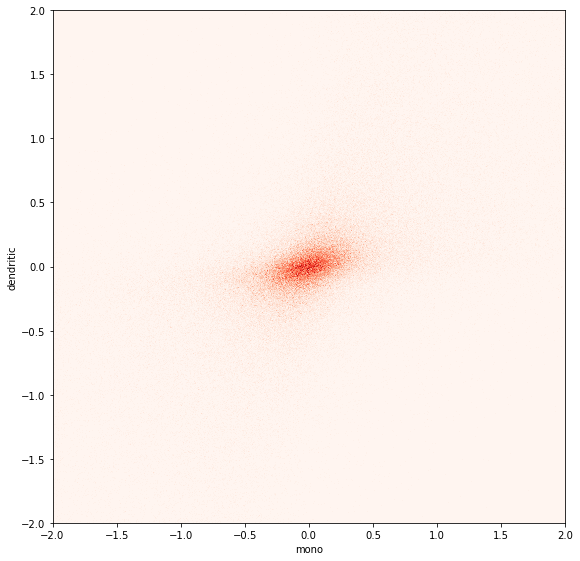

In [66]:
ct1_name = "mono"
ct2_name = "dendritic"

scatterPlotCellTypePairs(variant_info[ct1_name+"_"+"effect_score_normed"],
                        variant_info[ct2_name+"_"+"effect_score_normed"],
                         ct1_name,
                         ct2_name
                        )

# Note these are tanzi variant scores correlation plot

In [59]:
from scipy.stats import pearsonr, spearmanr
x = variant_info["mono_effect_score_normed"]
y = variant_info["dendritic_effect_score_normed"]
nas = np.logical_or(np.isnan(x), np.isnan(y))
print("Pearson correlation between mono and dendritic cells",pearsonr(x[~nas],y[~nas]))
print("Spearman correlation between mono and dendritic cells",spearmanr(x[~nas],y[~nas]))


Pearson correlation between mono and dendritic cells (0.6671883387381004, 0.0)
Spearman correlation between mono and dendritic cells SpearmanrResult(correlation=0.7021457653864379, pvalue=0.0)


In [3]:
# bulk mono and my mono correlation
bulk_scores="/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/rare_variants/encode_monocyte_effect_scores.txt"
bulk_mono_scores = pd.read_csv(bulk_scores,sep='\t',names=["effect_score",
                   "ref_score",
                   "alt_score"
                  ])
bulk_mono_scores['effect_score_normed'] = bulk_mono_scores['effect_score']/np.std(bulk_mono_scores['effect_score'])


In [ ]:
x = variant_info["mono_effect_score_normed"]
y = bulk_mono_scores['effect_score_normed'] 
nas = np.logical_or(np.isnan(x), np.isnan(y))
print("Pearson correlation between mono and bulk mono cells",pearsonr(x[~nas],y[~nas]))
print("Spearman correlation between mono and bulk mono cells",spearmanr(x[~nas],y[~nas]))

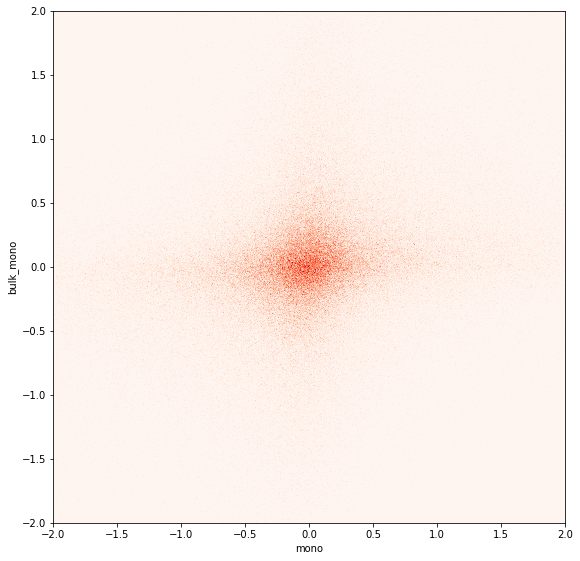

In [15]:
ct1_name = "mono"
ct2_name = "bulk_mono"

scatterPlotCellTypePairs(variant_info[ct1_name+"_"+"effect_score_normed"],
                         bulk_mono_scores['effect_score_normed'] ,
                         ct1_name,
                         ct2_name
                        )

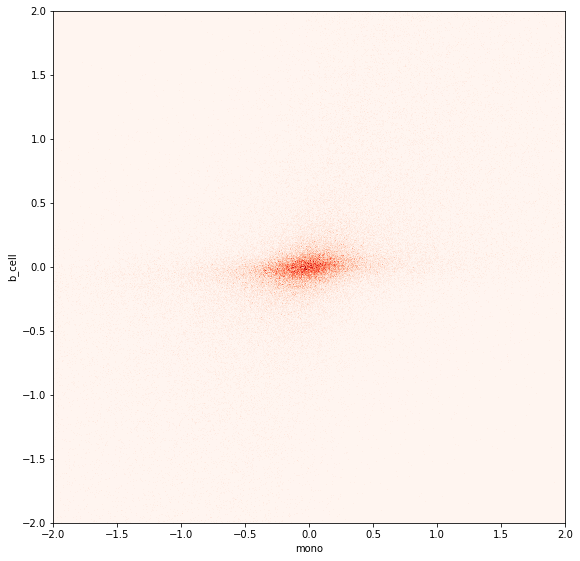

Pearson correlation between mono and b_cells (0.5804522851851901, 0.0)
Spearman correlation between mono and b_cells SpearmanrResult(correlation=0.6121145563395917, pvalue=0.0)


In [73]:
ct1_name = "mono"
ct2_name = "b_cell"

scatterPlotCellTypePairs(variant_info[ct1_name+"_"+"effect_score_normed"],
                        variant_info[ct2_name+"_"+"effect_score_normed"],
                         ct1_name,
                         ct2_name
                        )
from scipy.stats import pearsonr, spearmanr
x = variant_info["mono_effect_score_normed"]
y = variant_info["b_cell_effect_score_normed"]
nas = np.logical_or(np.isnan(x), np.isnan(y))
print("Pearson correlation between mono and b_cells",pearsonr(x[~nas],y[~nas]))
print("Spearman correlation between mono and b_cells",spearmanr(x[~nas],y[~nas]))

In [8]:
# archr mono tanzi score vs bulk mono tanzi scores
archr_mono_scores_file="Archr/tanzi_scores/mono_model_propagation_output.txt"
archr_mono_scores = pd.read_csv(archr_mono_scores_file,sep='\t',names=["effect_score",
                   "ref_score",
                   "alt_score"
                  ])
archr_mono_scores['effect_score_normed'] = archr_mono_scores['effect_score']/np.std(archr_mono_scores['effect_score'])

x = archr_mono_scores["effect_score_normed"]
y = bulk_mono_scores['effect_score_normed'] 
nas = np.logical_or(np.isnan(x), np.isnan(y))
print("Pearson correlation between mono and bulk mono cells",pearsonr(x[~nas],y[~nas]))
print("Spearman correlation between mono and bulk mono cells",spearmanr(x[~nas],y[~nas]))

Pearson correlation between mono and bulk mono cells (0.5756275003720449, 0.0)
Spearman correlation between mono and bulk mono cells SpearmanrResult(correlation=0.5402601432074884, pvalue=0.0)


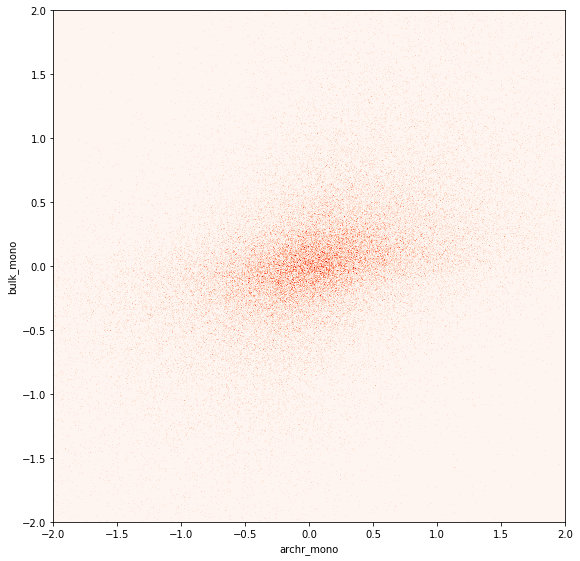

In [13]:
scatterPlotCellTypePairs(archr_mono_scores["effect_score_normed"],
                         bulk_mono_scores['effect_score_normed'] ,
                         'archr_mono',
                         'bulk_mono'
                        )

In [ ]:
import re, sys
# awk '{print $7}' GSE129785_scATAC-Hematopoiesis-All.cell_barcodes.txt > barcodes
f=open("../barcodes")
strings = f.readlines()
# run get_group_files.sh to get filtered_files
f=open("../filtered_files")
files = f.readlines()
def search_in_files(string):
    with open('../scate_files/proper/'+string +'.bed','w') as f:
        for file in files:
            with open("../fragment_files/"+file.strip()) as f_file:
                text = f_file.read()
                for match in re.finditer(".*"+string+".*",text):
                    f.write(match.group(0)+"\n")
    
list(map(search_in_files,strings))

